In [1]:
import ase
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from ase.neighborlist import NeighborList
import ensemble_analysis as ea
from tqdm import tqdm
import glob
import os
import random

In [2]:
def rdf_maker(file_list):
    # Extract energies using read_poscar_with_energy
    energies = {}
    for file_path in file_list:
        try:
            # Read the structure and energy from the POSCAR file
            atoms, energy = ea.read_poscar_with_energy(file_path)
            
            if energy is not None:
                # Use the base filename as the key
                base_filename = os.path.basename(file_path)
                energies[base_filename] = energy
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    print(f"Found {len(energies)} files with energies")

    weights = ea.calculate_weights(energies, temperature=1800)  # Assuming you have this function and energies
    print(weights)
    r_range = (0, 10)
    bins = 100
    element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

    # Calculate ensemble partial RDFs
    ensemble_partial_rdfs = ea.calculate_ensemble_partial_rdfs2(
        file_list, 
        weights, 
        r_range, 
        bins, 
        element_pairs
    )
    return ensemble_partial_rdfs


## Basic

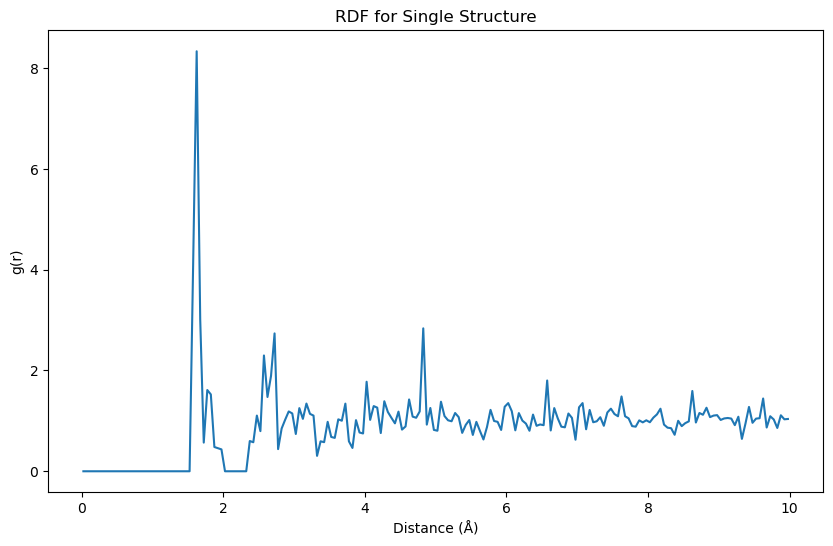

In [5]:
# Assuming you have a directory with POSCAR files
# 1. Calculate RDF for a single structure
file_path = '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/data/vasp_files/0.vasp'
atoms, _ = ea.read_poscar_with_energy(file_path)

# Basic RDF
r_values, g_r = ea.calculate_rdf(atoms, r_range=(0, 10), bins=200)

plt.figure(figsize=(10,6))
plt.plot(r_values, g_r)
plt.title('RDF for Single Structure')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.show()

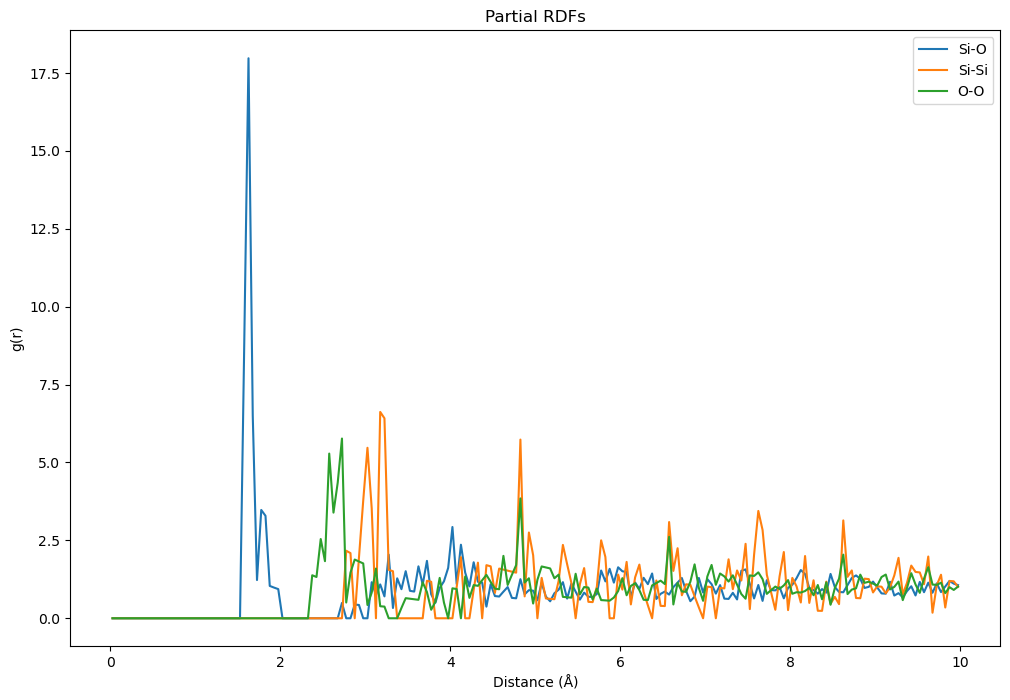

In [6]:

# 2. Calculate element-specific RDFs for a single structure
partial_rdfs = ea.calculate_partial_rdfs(
    atoms, 
    r_range=(0, 10), 
    bins=200, 
    element_pairs=[('Si', 'O'), ('Si', 'Si'), ('O', 'O')]
)

plt.figure(figsize=(12,8))
for (elem1, elem2), (r, rdf) in partial_rdfs.items():
    plt.plot(r, rdf, label=f'{elem1}-{elem2}')
plt.title('Partial RDFs')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.legend()
plt.show()


## Basic Average RDFs

Found 973 files
Extracted energy -1042.77464122 from 458.vasp
Extracted energy -1042.44999993 from 15.vasp
Extracted energy -1042.1648683 from 634.vasp
Extracted energy -1042.33671649 from 264.vasp
Extracted energy -1042.32908075 from 771.vasp
Extracted energy -1041.76705137 from 321.vasp
Extracted energy -1042.7700105 from 42.vasp
Extracted energy -1042.13025717 from 819.vasp
Extracted energy -1042.51049669 from 233.vasp
Extracted energy -1042.65436699 from 399.vasp
Extracted energy -1042.69917212 from 376.vasp
Extracted energy -1042.43945345 from 726.vasp
Extracted energy -1041.99217547 from 419.vasp
Extracted energy -1042.38116175 from 54.vasp
Extracted energy -1042.33969358 from 675.vasp
Extracted energy -1041.91389671 from 225.vasp
Extracted energy -1042.77311917 from 730.vasp
Extracted energy -1042.68280863 from 360.vasp
Extracted energy -1042.73196868 from 858.vasp
Extracted energy -1042.05411632 from 272.vasp
Extracted energy -1042.46666883 from 788.vasp
Extracted energy -1042.

Calculating ensemble RDF: 100%|██████████| 973/973 [01:24<00:00, 11.56it/s]

R values shape: (200,)
Ensemble RDF shape: (200,)
Ensemble RDF min/max: 0.0 15.335956998912684


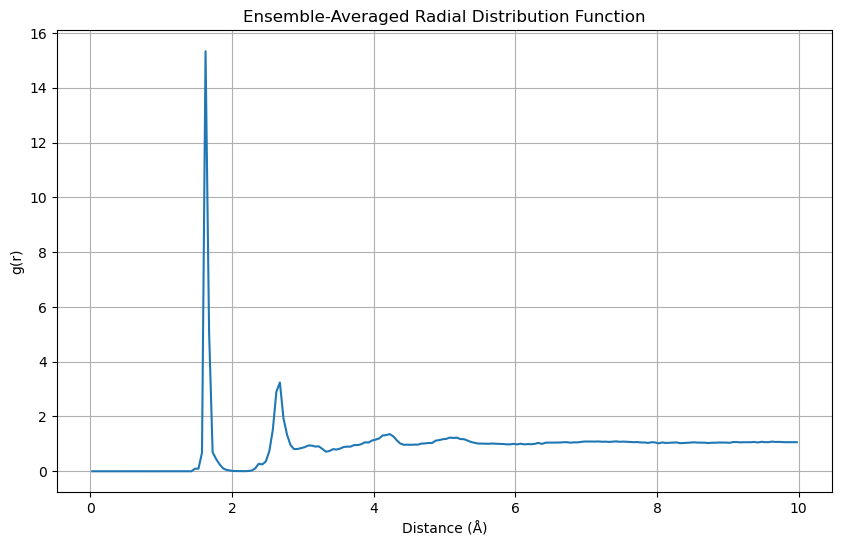

In [9]:
# First, get the list of files
file_pattern = '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/data/vasp_files/*.vasp'
# First, get the list of files
file_list = glob.glob(file_pattern)
print(f"Found {len(file_list)} files")

# Extract energies using read_poscar_with_energy
energies = {}
for file_path in file_list:
    try:
        # Read the structure and energy from the POSCAR file
        atoms, energy = ea.read_poscar_with_energy(file_path)
        
        if energy is not None:
            # Use the base filename as the key
            base_filename = os.path.basename(file_path)
            energies[base_filename] = energy
            print(f"Extracted energy {energy} from {base_filename}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print(f"Found {len(energies)} files with energies")

# Calculate weights
weights = ea.calculate_weights(energies, temperature=1800)



# Calculate and plot ensemble RDF
r_values, ensemble_rdf = ea.calculate_ensemble_rdf2(
    file_list, 
    weights, 
    r_range=(0, 10), 
    bins=200
)

# Diagnostic prints
print("R values shape:", r_values.shape)
print("Ensemble RDF shape:", ensemble_rdf.shape)
print("Ensemble RDF min/max:", ensemble_rdf.min(), ensemble_rdf.max())

# Plot the RDF
plt.figure(figsize=(10, 6))
plt.plot(r_values, ensemble_rdf)
plt.title('Ensemble-Averaged Radial Distribution Function')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.grid(True)
plt.show()

In [10]:
# Define parameters
file_list = glob.glob("/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/data/vasp_files/*.vasp")  # Adjust the path pattern
# Extract energies using read_poscar_with_energy
energies = {}
for file_path in file_list:
    try:
        # Read the structure and energy from the POSCAR file
        atoms, energy = ea.read_poscar_with_energy(file_path)
        
        if energy is not None:
            # Use the base filename as the key
            base_filename = os.path.basename(file_path)
            energies[base_filename] = energy
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print(f"Found {len(energies)} files with energies")

weights = ea.calculate_weights(energies, temperature=1800)  # Assuming you have this function and energies
print(weights)
r_range = (0, 10)
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Calculate ensemble partial RDFs
ensemble_partial_rdfs = ea.calculate_ensemble_partial_rdfs2(
    file_list, 
    weights, 
    r_range, 
    bins, 
    element_pairs
)


Found 973 files with energies
{'458.vasp': 0.001942435642726635, '15.vasp': 0.000593001680441716, '634.vasp': 0.00020915939798967208, '264.vasp': 0.00039196333891012685, '771.vasp': 0.0003811759840818755, '321.vasp': 4.886948602713728e-05, '42.vasp': 0.0019098377511440503, '819.vasp': 0.0001843064181627078, '233.vasp': 0.0007397417315197926, '399.vasp': 0.001251526209854783, '376.vasp': 0.0014742034388465714, '726.vasp': 0.0005705791521809496, '419.vasp': 0.0001112675826854514, '54.vasp': 0.00046109637865233, '675.vasp': 0.00039625145481187444, '225.vasp': 8.358334900933652e-05, '730.vasp': 0.0019316602670154935, '360.vasp': 0.0013886227546392195, '858.vasp': 0.0016619354298775275, '272.vasp': 0.00013953559137587295, '788.vasp': 0.0006302514188985601, '622.vasp': 0.0012415323392518656, '337.vasp': 0.0012015930080313672, '570.vasp': 0.00016172043413897031, '120.vasp': 0.0009070103956732872, '78.vasp': 0.0028182071944958613, '989.vasp': 1.2366683419200912e-05, '823.vasp': 0.0015511623774

Calculating ensemble partial RDFs: 100%|██████████| 973/973 [01:44<00:00,  9.29it/s]


In [22]:
# Read the structure
file_path = '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/data/vasp_files/0.vasp'
atoms, _ = ea.read_poscar_with_energy(file_path)

# Calculate number density (atoms per volume)
n_atoms = len(atoms)
volume = atoms.get_volume()
number_density = n_atoms / volume
atoms.get_positions(), atoms.get_cell(), atoms.get_volume()

(array([[-4.4306049 , -1.96716008,  4.49594592],
        [-6.7373328 , -2.60142325,  5.41508577],
        [ 7.24864929,  0.61206448,  2.40031017],
        [-1.14631879, -0.11788053,  3.32166308],
        [ 0.70649947, -2.02453207,  2.23195573],
        [ 2.72967551, -2.70793136,  3.84420419],
        [-2.06260039, -3.77121562,  5.50790825],
        [ 1.68982185, -0.42135195,  4.46654841],
        [ 4.75906005,  0.97876162,  1.83132441],
        [ 1.12488741,  0.33063029,  2.18417897],
        [-5.28294592, -4.64623467,  4.3969334 ],
        [ 8.9861102 ,  4.5291283 ,  0.77944579],
        [-2.22023669, -2.71082711,  3.06050751],
        [ 2.63930656,  2.50208351,  1.00107943],
        [ 5.13789817, -1.25219254,  2.49709901],
        [-0.11064949, -2.20442283,  4.50310258],
        [ 2.63215378, -1.61965977,  5.07220766],
        [ 0.53865159, -0.81433751,  3.34127175],
        [ 5.75874446,  0.20746328,  3.07316761],
        [-5.26019417, -3.20245617,  5.08020837],
        [ 1.61946583

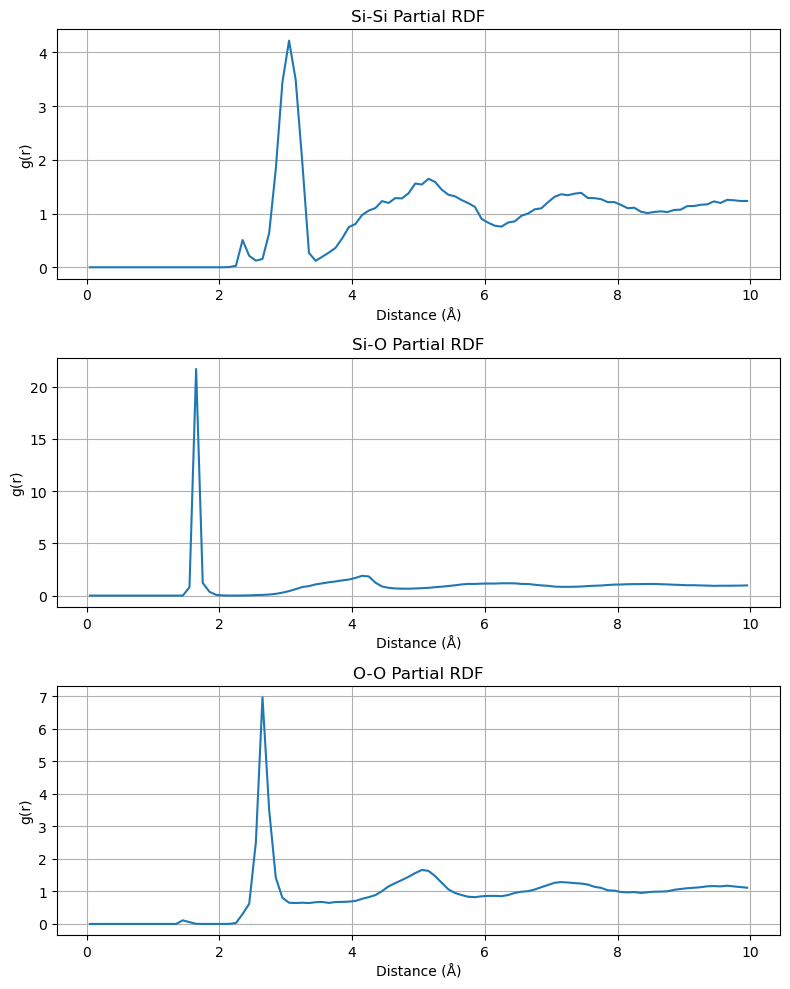

In [11]:

plt.figure(figsize=(8, 10))

# Iterate through the partial RDFs
for i, ((elem1, elem2), (r, rdf)) in enumerate(ensemble_partial_rdfs.items(), 1):
    plt.subplot(3, 1, i)
    plt.plot(r, rdf)
    plt.title(f'{elem1}-{elem2} Partial RDF')
    plt.xlabel('Distance (Å)')
    plt.ylabel('g(r)')
    plt.grid(True)

plt.tight_layout()
plt.show()

Found 973 total files
Selected 50 files randomly


Reading energies: 100%|██████████| 50/50 [00:00<00:00, 793.44it/s]


Successfully extracted energies from 50 files


Calculating ensemble partial RDFs: 100%|██████████| 50/50 [00:05<00:00,  8.82it/s]


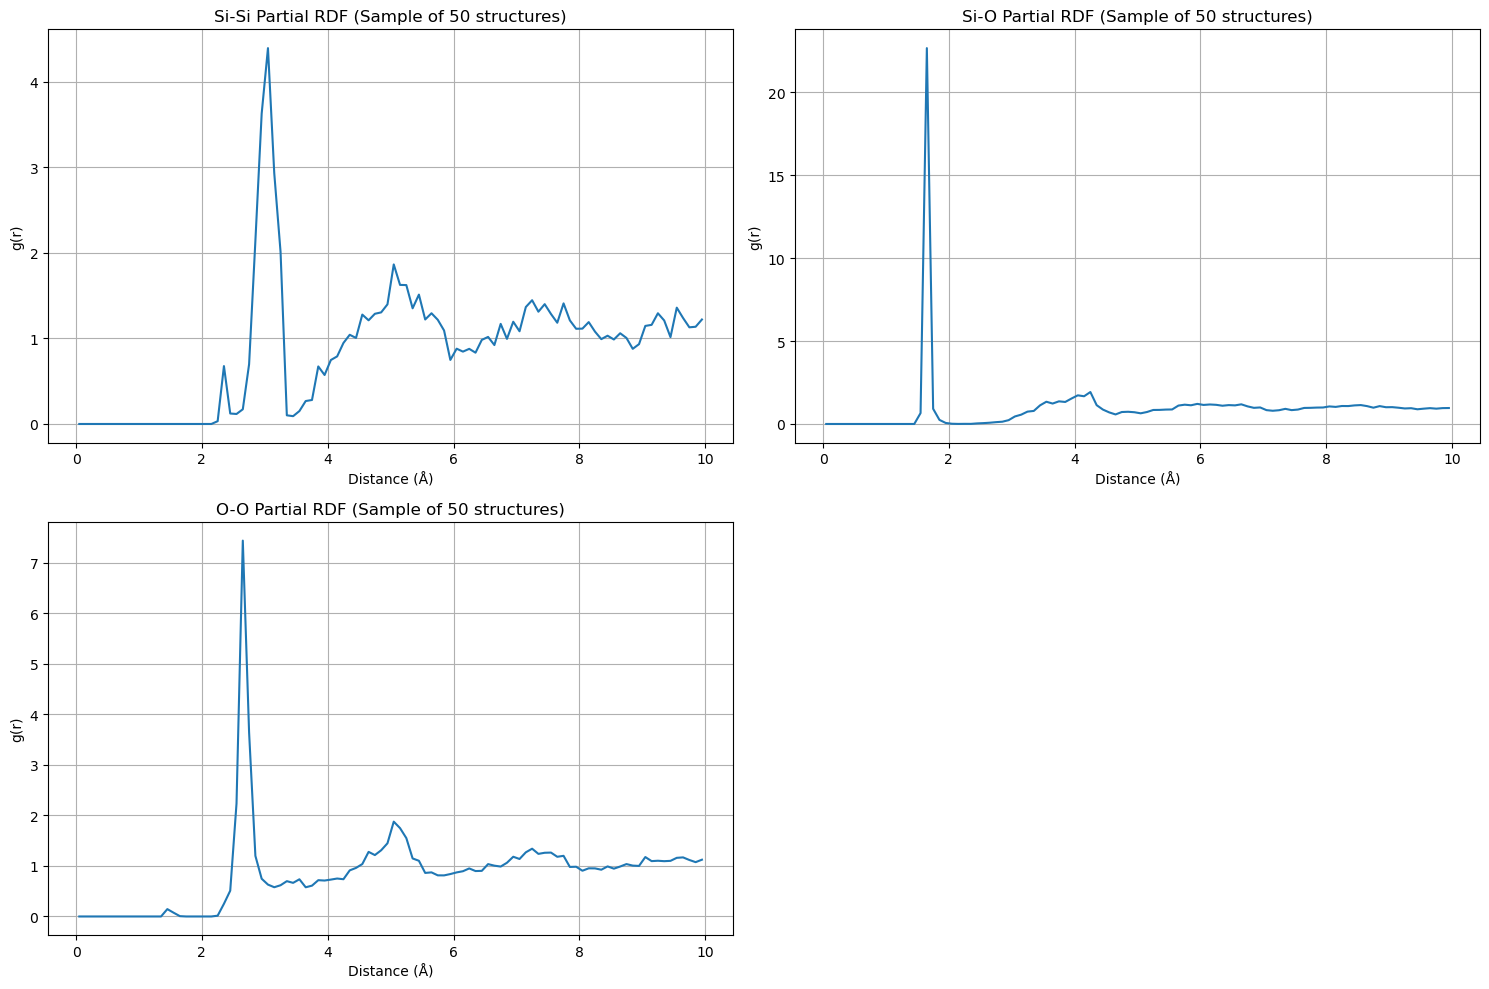

In [15]:
# Define path to files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)

print(f"Found {len(all_files)} total files")

# Draw a random sample of 50 files
sample_size = 50
if len(all_files) >= sample_size:
    sampled_files = random.sample(all_files, sample_size)
else:
    print(f"Warning: Requested sample size {sample_size} is larger than available files ({len(all_files)})")
    sampled_files = all_files.copy()

print(f"Selected {len(sampled_files)} files randomly")

# Extract energies from the sampled files
energies = {}
for file_path in tqdm(sampled_files, desc="Reading energies"):
    try:
        # Read the structure and energy from the POSCAR file
        atoms, energy = ea.read_poscar_with_energy(file_path)
        
        if energy is not None:
            # Use the base filename as the key
            base_filename = os.path.basename(file_path)
            energies[base_filename] = energy
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print(f"Successfully extracted energies from {len(energies)} files")

# Calculate Boltzmann weights
temperature = 1800  # K
weights = ea.calculate_weights(energies, temperature)

# RDF calculation parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Calculate ensemble partial RDFs using the sampled files
ensemble_partial_rdfs = ea.calculate_ensemble_partial_rdfs(
    sampled_files, 
    weights, 
    r_range, 
    bins, 
    element_pairs
)

# Plotting the results
plt.figure(figsize=(15, 10))

# Iterate through the partial RDFs
for i, ((elem1, elem2), (r, rdf)) in enumerate(ensemble_partial_rdfs.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(r, rdf)
    plt.title(f'{elem1}-{elem2} Partial RDF (Sample of {sample_size} structures)')
    plt.xlabel('Distance (Å)')
    plt.ylabel('g(r)')
    plt.grid(True)

plt.tight_layout()
plt.savefig('partial_rdfs_random_sample.png')
plt.show()

## Compilations of Random Data

Found 973 POSCAR files


Processing random samples: 100%|██████████| 50/50 [04:50<00:00,  5.80s/it]


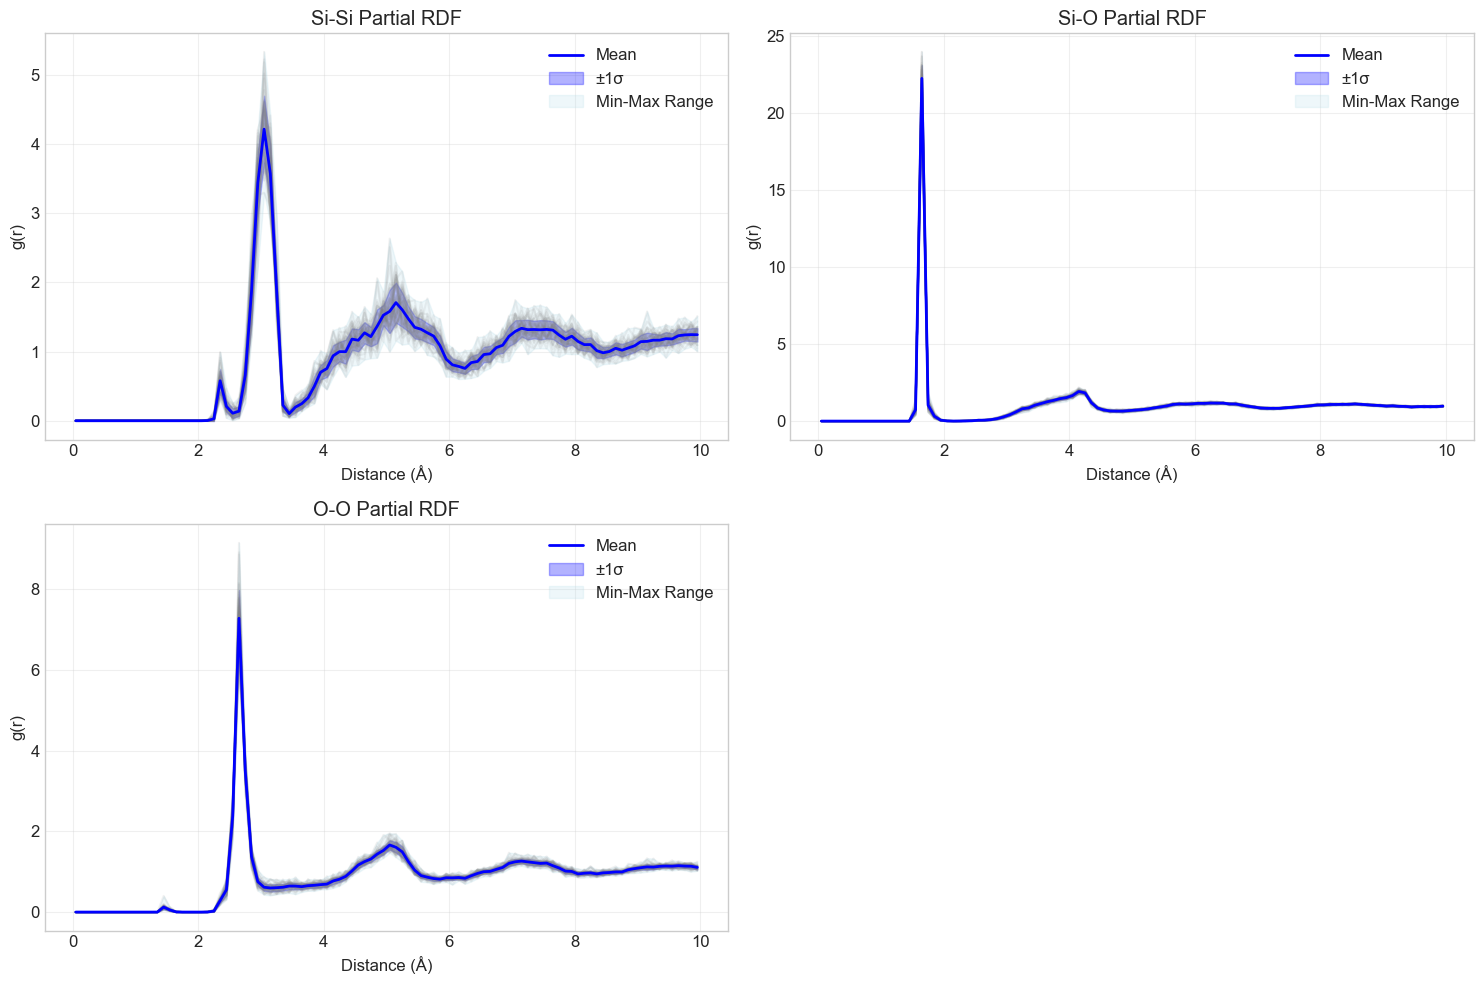

In [ ]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 50
num_samples = 50
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)


Found 973 POSCAR files


Processing random samples: 100%|██████████| 25/25 [04:54<00:00, 11.77s/it]


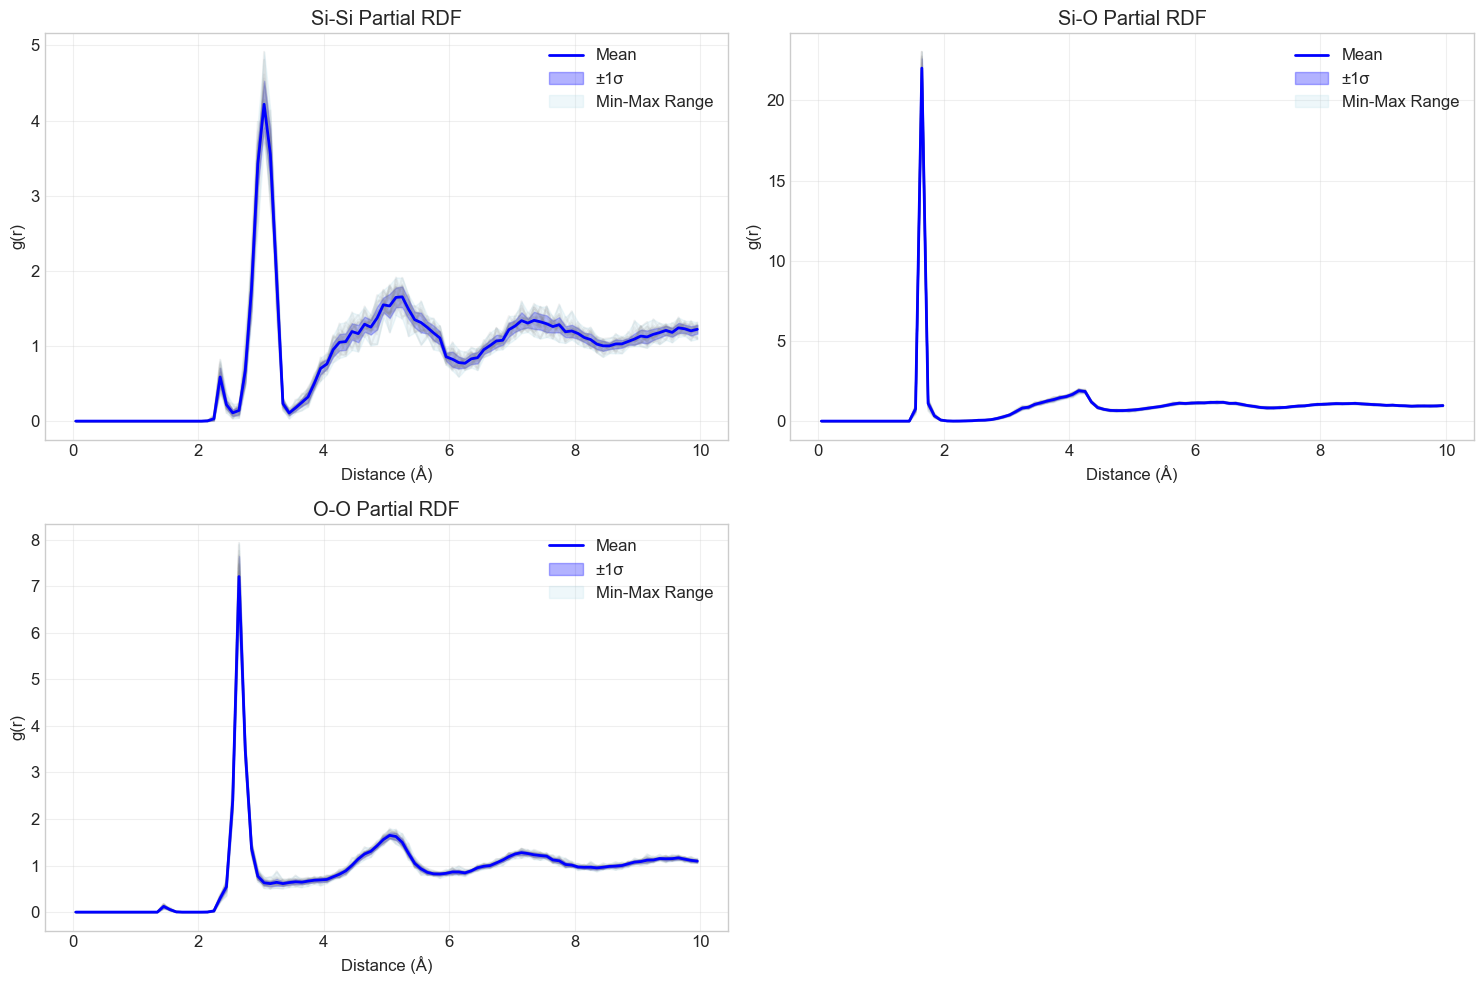

In [6]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 100
num_samples = 25
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

Found 973 POSCAR files


Processing random samples: 100%|██████████| 10/10 [04:53<00:00, 29.30s/it]


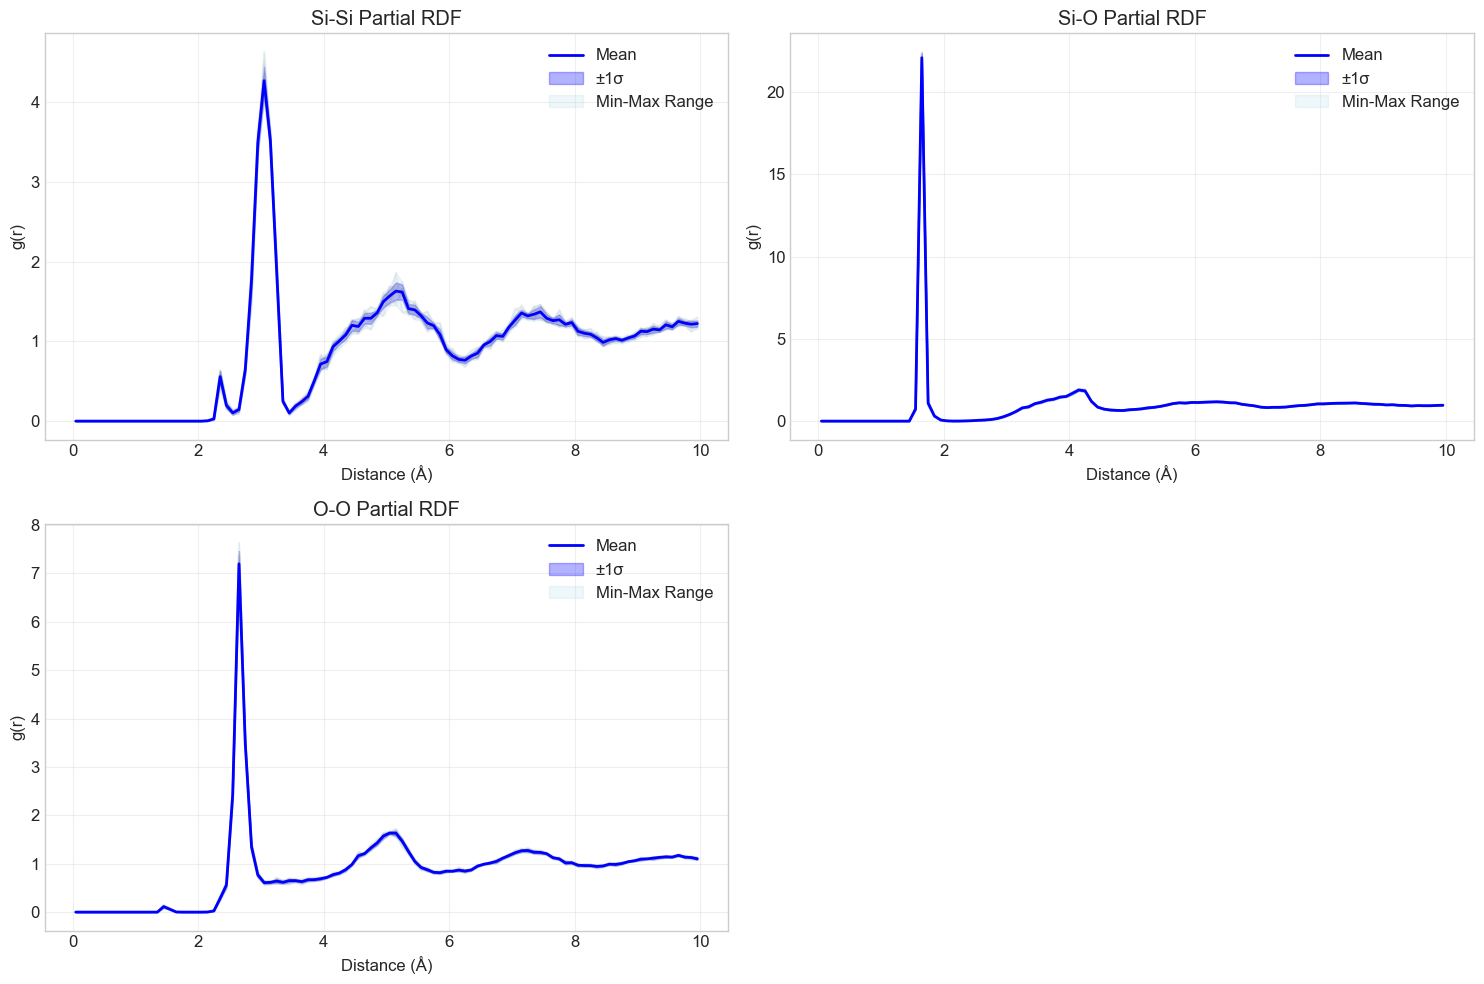

In [7]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 250
num_samples = 10
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

Found 973 POSCAR files


Processing random samples: 100%|██████████| 5/5 [04:54<00:00, 58.92s/it]


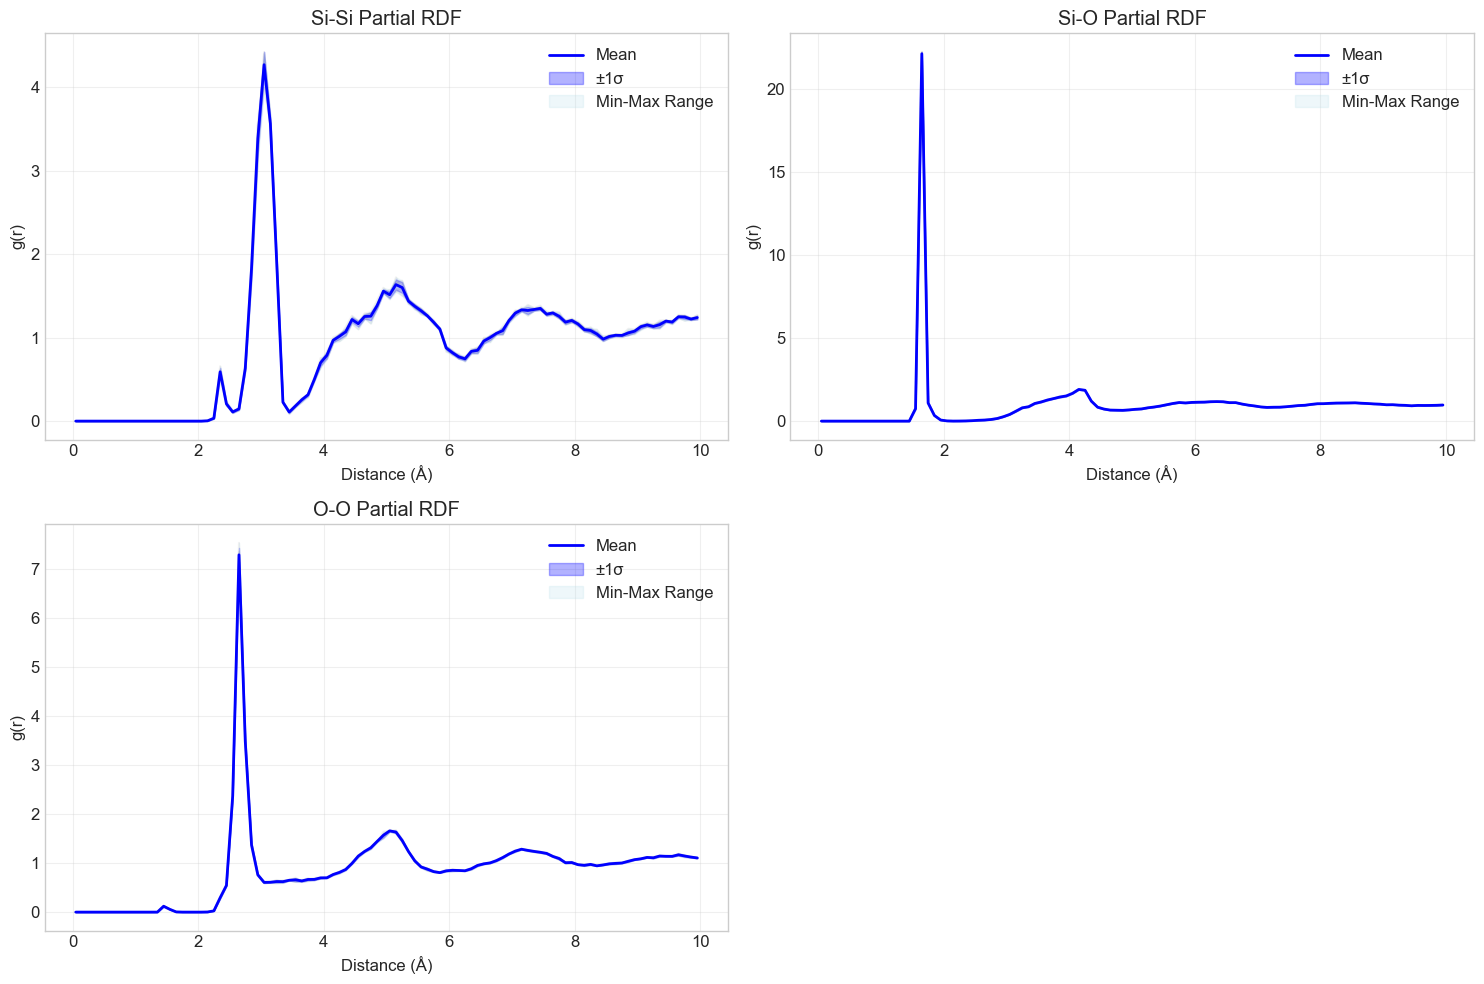

In [8]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 500
num_samples = 5
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

Found 973 POSCAR files


Processing random samples: 100%|██████████| 10/10 [01:01<00:00,  6.11s/it]


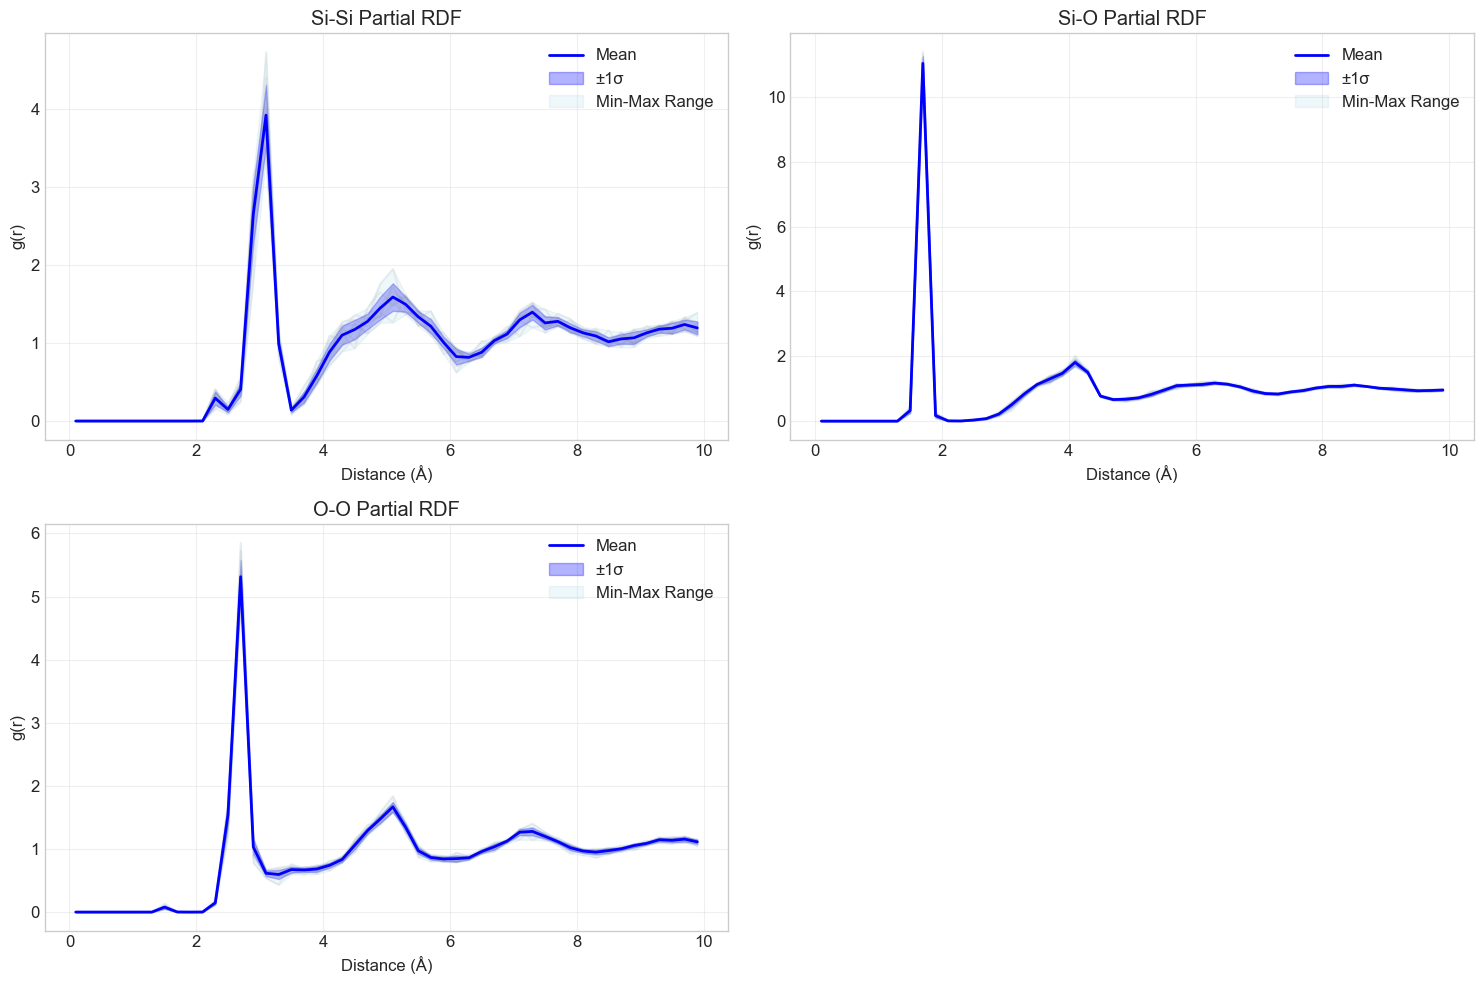

In [9]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 50
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 50
num_samples = 10
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

In [1]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 50
num_samples = 10
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

NameError: name 'plt' is not defined

Found 973 POSCAR files


Processing random samples: 100%|██████████| 50/50 [04:55<00:00,  5.92s/it]


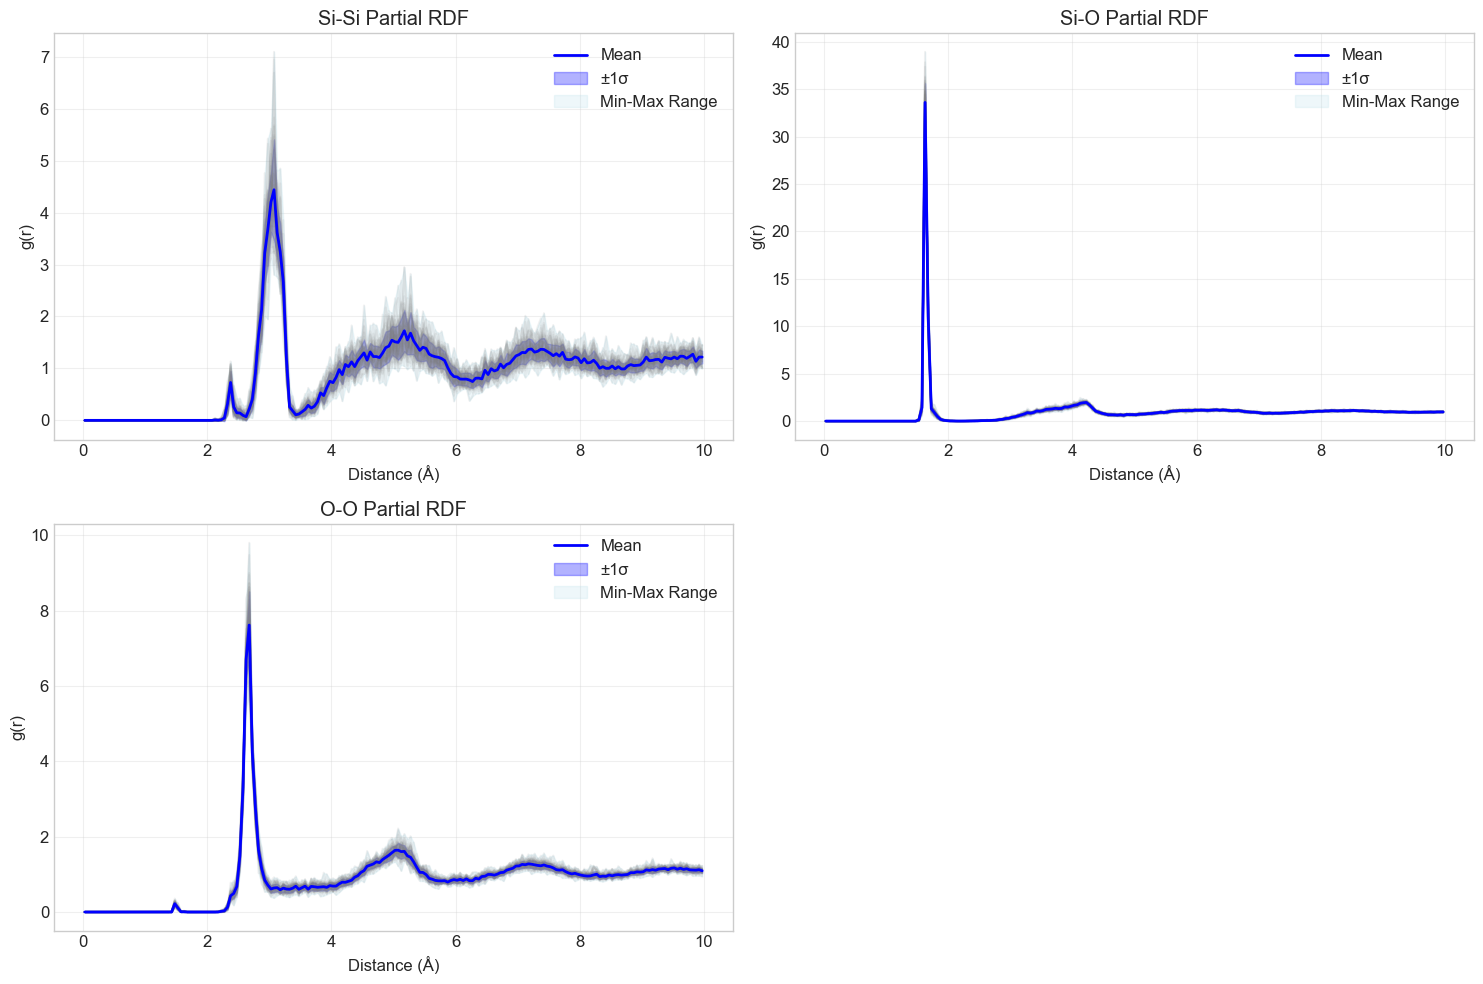

In [12]:
# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Find all POSCAR files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.poscar"
all_files = glob.glob(file_path_pattern)
print(f"Found {len(all_files)} POSCAR files")

# Define analysis parameters
r_range = (0, 10)  # Angstroms
bins = 200
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Generate 50 random samples of 50 structures each
sample_size = 50
num_samples = 50
temperature = 1800  # K

rdf_results = ea.calculate_random_samples_rdf(
    all_files, 
    r_range, 
    bins, 
    element_pairs,
    sample_size=sample_size,
    num_samples=num_samples,
    temperature=temperature
)

# Plot the results with statistics
ea.plot_rdf_statistics(
    rdf_results, 
    plot_all_samples=True  # Set to False if you have many samples to avoid cluttering
)

## Next

Found 973 total files
Selected 50 files randomly
Found 50 files with energies
{'SiO2_24_718_iteration3.vasp': 0.03858644821027687, 'SiO2_24_957_iteration3.vasp': 0.019233414291991463, 'SiO2_24_391_iteration3.vasp': 0.022756582763094124, 'SiO2_24_74_iteration3.vasp': 0.013469606742737637, 'SiO2_24_316_iteration3.vasp': 0.013227816969236302, 'SiO2_24_436_iteration3.vasp': 0.0014540467286419164, 'SiO2_24_260_iteration3.vasp': 0.04536021526708045, 'SiO2_24_466_iteration3.vasp': 0.022234943466514705, 'SiO2_24_479_iteration3.vasp': 0.004837216179012971, 'SiO2_24_823_iteration3.vasp': 0.03235503082210562, 'SiO2_24_550_iteration3.vasp': 0.020107624185684698, 'SiO2_24_352_iteration3.vasp': 0.06245279488800473, 'SiO2_24_590_iteration3.vasp': 0.0953695350748703, 'SiO2_24_611_iteration3.vasp': 0.03665168288860294, 'SiO2_24_293_iteration3.vasp': 0.003593127197221234, 'SiO2_24_491_iteration3.vasp': 0.0050533840635959976, 'SiO2_24_937_iteration3.vasp': 0.005542150928417537, 'SiO2_24_98_iteration3.vas

Calculating ensemble partial RDFs: 100%|██████████| 50/50 [00:06<00:00,  8.25it/s]


Found 50 files with energies
{'SiO2_24_725_iteration3.vasp': 0.010887707121775564, 'SiO2_24_394_iteration3.vasp': 0.014876809720738684, 'SiO2_24_457_iteration3.vasp': 0.046195466642573776, 'SiO2_24_418_iteration3.vasp': 0.011093906349500455, 'SiO2_24_682_iteration3.vasp': 0.0395177305056908, 'SiO2_24_584_iteration3.vasp': 0.0060173356379057946, 'SiO2_24_518_iteration3.vasp': 0.004498256480887313, 'SiO2_24_170_iteration3.vasp': 0.04899327241531229, 'SiO2_24_320_iteration3.vasp': 0.03109598508985019, 'SiO2_24_949_iteration3.vasp': 0.0029379482300033446, 'SiO2_24_430_iteration3.vasp': 0.02253223415721039, 'SiO2_24_172_iteration3.vasp': 0.06490687066609473, 'SiO2_24_526_iteration3.vasp': 0.004757707067155442, 'SiO2_24_623_iteration3.vasp': 0.00976331174231106, 'SiO2_24_742_iteration3.vasp': 0.04319160834467202, 'SiO2_24_576_iteration3.vasp': 0.006439038042028081, 'SiO2_24_918_iteration3.vasp': 0.009966577023162743, 'SiO2_24_118_iteration3.vasp': 0.006332064992586384, 'SiO2_24_794_iteration

Calculating ensemble partial RDFs: 100%|██████████| 50/50 [00:05<00:00,  8.45it/s]


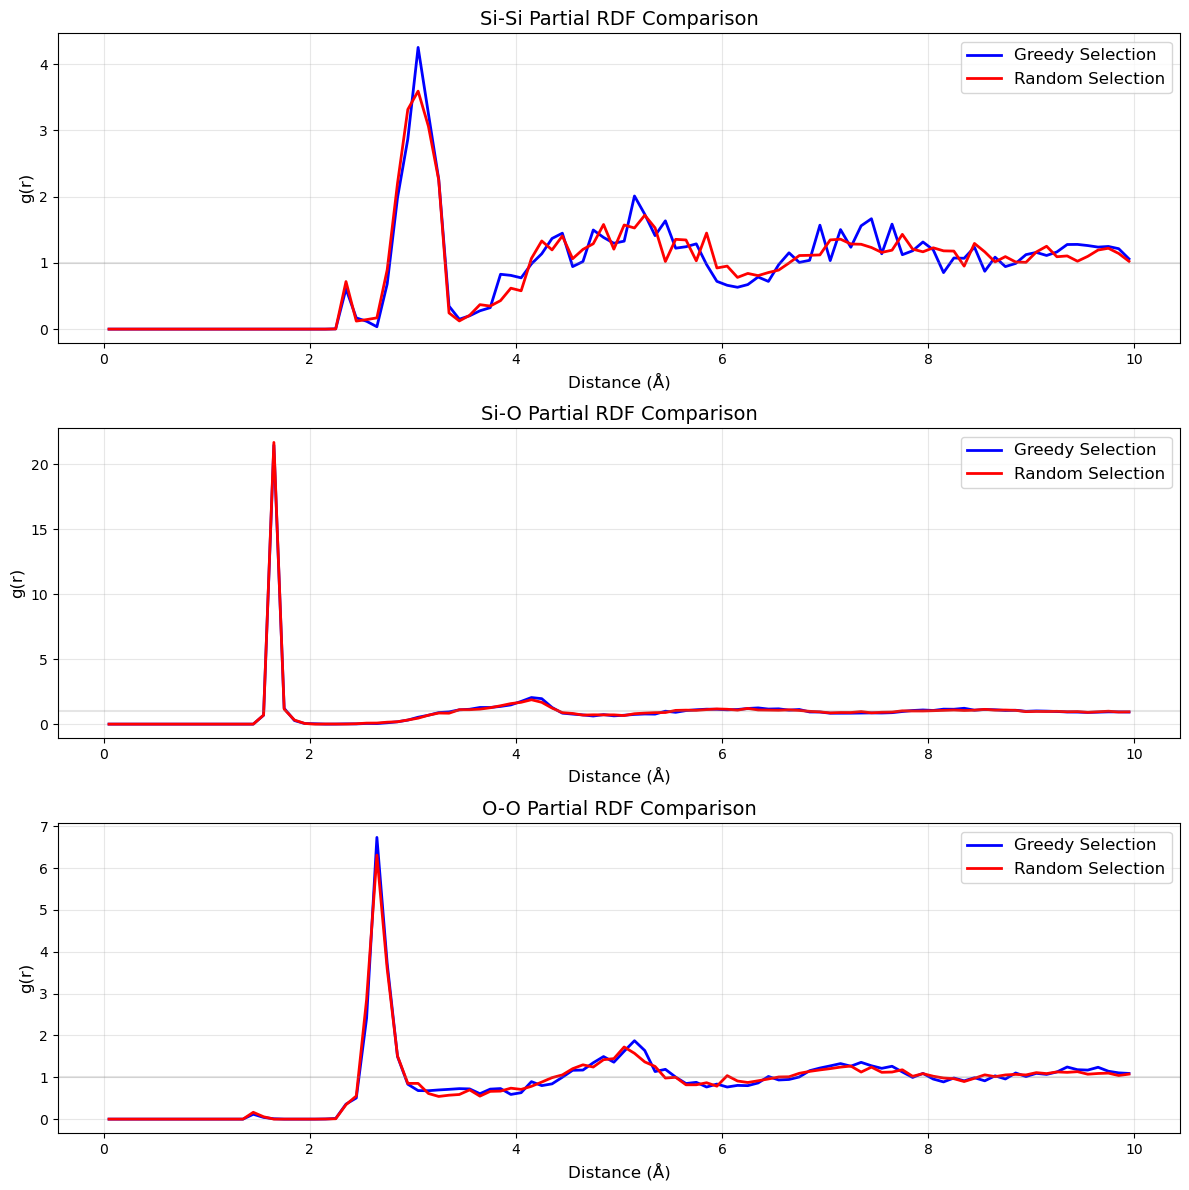

In [36]:
sample_size=50
selected_indices_mm = [718, 957, 391, 74, 316, 436, 260, 466, 479, 823, 550, 352, 590, 611, 293, 491, 937, 98, 919, 240, 698, 818, 990, 551, 46, 463, 571, 802, 556, 149, 709, 670, 988, 157, 786, 657, 160, 336, 209, 674, 52, 725, 967, 537, 612, 246, 946, 564, 338, 843]

# Define base path and file format
base_path = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_"
file_extension = "_iteration3.vasp"

# Generate the file paths
greedy_files = [f"{base_path}{num}{file_extension}" for num in selected_indices_mm]
# Define path to files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.vasp"
all_files = glob.glob(file_path_pattern)

print(f"Found {len(all_files)} total files")

# Draw a random sample of 50 files
if len(all_files) >= sample_size:
    random_files = random.sample(all_files, sample_size)
else:
    print(f"Warning: Requested sample size {sample_size} is larger than available files ({len(all_files)})")
    random_files = all_files.copy()

print(f"Selected {len(random_files)} files randomly")
greedy_rdf = rdf_maker(greedy_files)
random_rdf = rdf_maker(random_files)

plt.figure(figsize=(12, 12))

# Iterate through the partial RDFs
for i, (elem_pair, _) in enumerate(greedy_rdf.items(), 1):
    elem1, elem2 = elem_pair
    
    plt.subplot(3, 1, i)
    
    # Plot greedy RDF
    r_greedy, rdf_greedy = greedy_rdf[elem_pair]
    plt.plot(r_greedy, rdf_greedy, 'b-', label='Greedy Selection', linewidth=2)
    
    # Plot random RDF
    r_random, rdf_random = random_rdf[elem_pair]
    plt.plot(r_random, rdf_random, 'r-', label='Random Selection', linewidth=2)
    
    plt.title(f'{elem1}-{elem2} Partial RDF Comparison', fontsize=14)
    plt.xlabel('Distance (Å)', fontsize=12)
    plt.ylabel('g(r)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Add subtle background shading for clearer comparison
    plt.axhline(y=1, color='gray', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

100
['/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_718_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_957_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_391_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_74_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_316_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_436_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_260_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_466_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_479_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_pos

Calculating ensemble partial RDFs: 100%|██████████| 100/100 [00:11<00:00,  8.52it/s]


Found 100 files with energies
{'SiO2_24_759_iteration3.vasp': 0.0071441896974456885, 'SiO2_24_612_iteration3.vasp': 0.0019135065017351495, 'SiO2_24_683_iteration3.vasp': 0.000903584184477864, 'SiO2_24_348_iteration3.vasp': 0.001934137588137697, 'SiO2_24_249_iteration3.vasp': 0.006600228439486115, 'SiO2_24_438_iteration3.vasp': 0.01627560192825344, 'SiO2_24_961_iteration3.vasp': 0.01604298466588052, 'SiO2_24_353_iteration3.vasp': 0.0009237654807040038, 'SiO2_24_745_iteration3.vasp': 0.013847242408440005, 'SiO2_24_237_iteration3.vasp': 0.020096543433681665, 'SiO2_24_803_iteration3.vasp': 0.008951244645944649, 'SiO2_24_314_iteration3.vasp': 0.03252316766589227, 'SiO2_24_201_iteration3.vasp': 0.003217123469933535, 'SiO2_24_646_iteration3.vasp': 0.0018117680001091534, 'SiO2_24_799_iteration3.vasp': 0.014988422431521719, 'SiO2_24_0_iteration3.vasp': 0.007889136763598488, 'SiO2_24_259_iteration3.vasp': 0.001560108035004584, 'SiO2_24_435_iteration3.vasp': 0.010832370173292562, 'SiO2_24_920_ite

Calculating ensemble partial RDFs: 100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


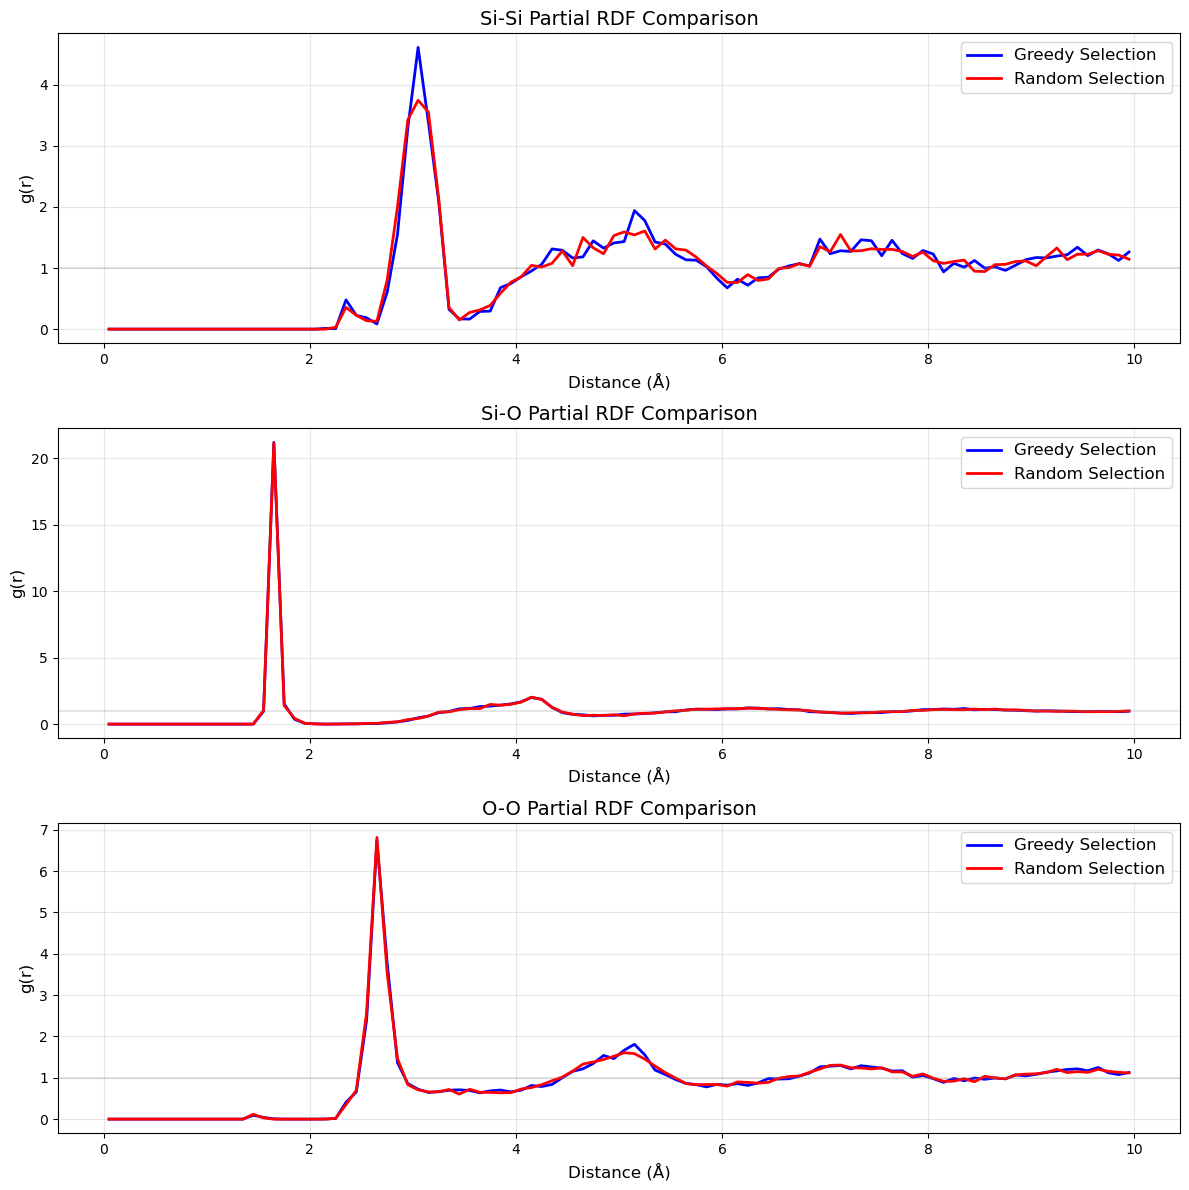

In [ ]:
sample_size=100
selected_indices_mm = [718, 957, 391, 74, 316, 436, 260, 466, 479, 823, 550, 352, 590, 611, 293, 491, 937, 98, 919, 240, 698, 818, 990, 551, 46, 463, 571, 802, 556, 149, 709, 670, 988, 157, 786, 657, 160, 336, 209, 674, 52, 725, 967, 537, 612, 246, 946, 564, 338, 843, 748, 435, 518, 264, 963, 271, 886, 596, 182, 183, 139, 508, 329, 298, 862, 577, 829, 44, 775, 49, 66, 853, 492, 906, 434, 18, 366, 277, 721, 683, 420, 890, 655, 402, 239, 504, 372, 422, 676, 519, 224, 455, 825, 659, 73, 545, 387, 184, 194, 181]
print(len(selected_indices_mm))
# Define base path and file format
base_path = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_"
file_extension = "_iteration3.vasp"

# Generate the file paths
greedy_files = [f"{base_path}{num}{file_extension}" for num in selected_indices_mm]
print(greedy_files)
# Define path to files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.vasp"
all_files = glob.glob(file_path_pattern)

print(f"Found {len(all_files)} total files")

# Draw a random sample of 100 files
if len(all_files) >= sample_size:
    random_files = random.sample(all_files, sample_size)
else:
    print(f"Warning: Requested sample size {sample_size} is larger than available files ({len(all_files)})")
    random_files = all_files.copy()

print(f"Selected {len(random_files)} files randomly")
greedy_rdf = rdf_maker(greedy_files)
random_rdf = rdf_maker(random_files)r

plt.figure(figsize=(12, 12))

# Iterate through the partial RDFs
for i, (elem_pair, _) in enumerate(greedy_rdf.items(), 1):
    elem1, elem2 = elem_pair
    
    plt.subplot(3, 1, i)
    
    # Plot greedy RDF
    r_greedy, rdf_greedy = greedy_rdf[elem_pair]
    plt.plot(r_greedy, rdf_greedy, 'b-', label='Greedy Selection', linewidth=2)
    
    # Plot random RDF
    r_random, rdf_random = random_rdf[elem_pair]
    plt.plot(r_random, rdf_random, 'r-', label='Random Selection', linewidth=2)
    
    plt.title(f'{elem1}-{elem2} Partial RDF Comparison', fontsize=14)
    plt.xlabel('Distance (Å)', fontsize=12)
    plt.ylabel('g(r)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Add subtle background shading for clearer comparison
    plt.axhline(y=1, color='gray', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

200
['/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_718_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_957_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_391_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_74_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_316_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_436_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_260_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_466_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_479_iteration3.vasp', '/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_pos

Calculating ensemble partial RDFs: 100%|██████████| 200/200 [00:23<00:00,  8.51it/s]


Found 200 files with energies
{'SiO2_24_926_iteration3.vasp': 0.00261686188642312, 'SiO2_24_120_iteration3.vasp': 0.0037126182463515477, 'SiO2_24_7_iteration3.vasp': 0.0029153163568271545, 'SiO2_24_319_iteration3.vasp': 0.00019046565239707214, 'SiO2_24_492_iteration3.vasp': 0.017755323379297656, 'SiO2_24_447_iteration3.vasp': 0.003565402467859827, 'SiO2_24_110_iteration3.vasp': 0.0014763563952668098, 'SiO2_24_468_iteration3.vasp': 0.0008604955166322212, 'SiO2_24_962_iteration3.vasp': 0.0017959108507691324, 'SiO2_24_933_iteration3.vasp': 0.010379035670746783, 'SiO2_24_963_iteration3.vasp': 0.008985354367612981, 'SiO2_24_537_iteration3.vasp': 0.007112447480720385, 'SiO2_24_934_iteration3.vasp': 0.002043544120245471, 'SiO2_24_77_iteration3.vasp': 0.00722722191736285, 'SiO2_24_261_iteration3.vasp': 0.0009545813087993211, 'SiO2_24_304_iteration3.vasp': 0.0029188548684322795, 'SiO2_24_40_iteration3.vasp': 0.0012498632067271256, 'SiO2_24_133_iteration3.vasp': 0.009728481172693754, 'SiO2_24_52

Calculating ensemble partial RDFs: 100%|██████████| 200/200 [00:22<00:00,  9.01it/s]


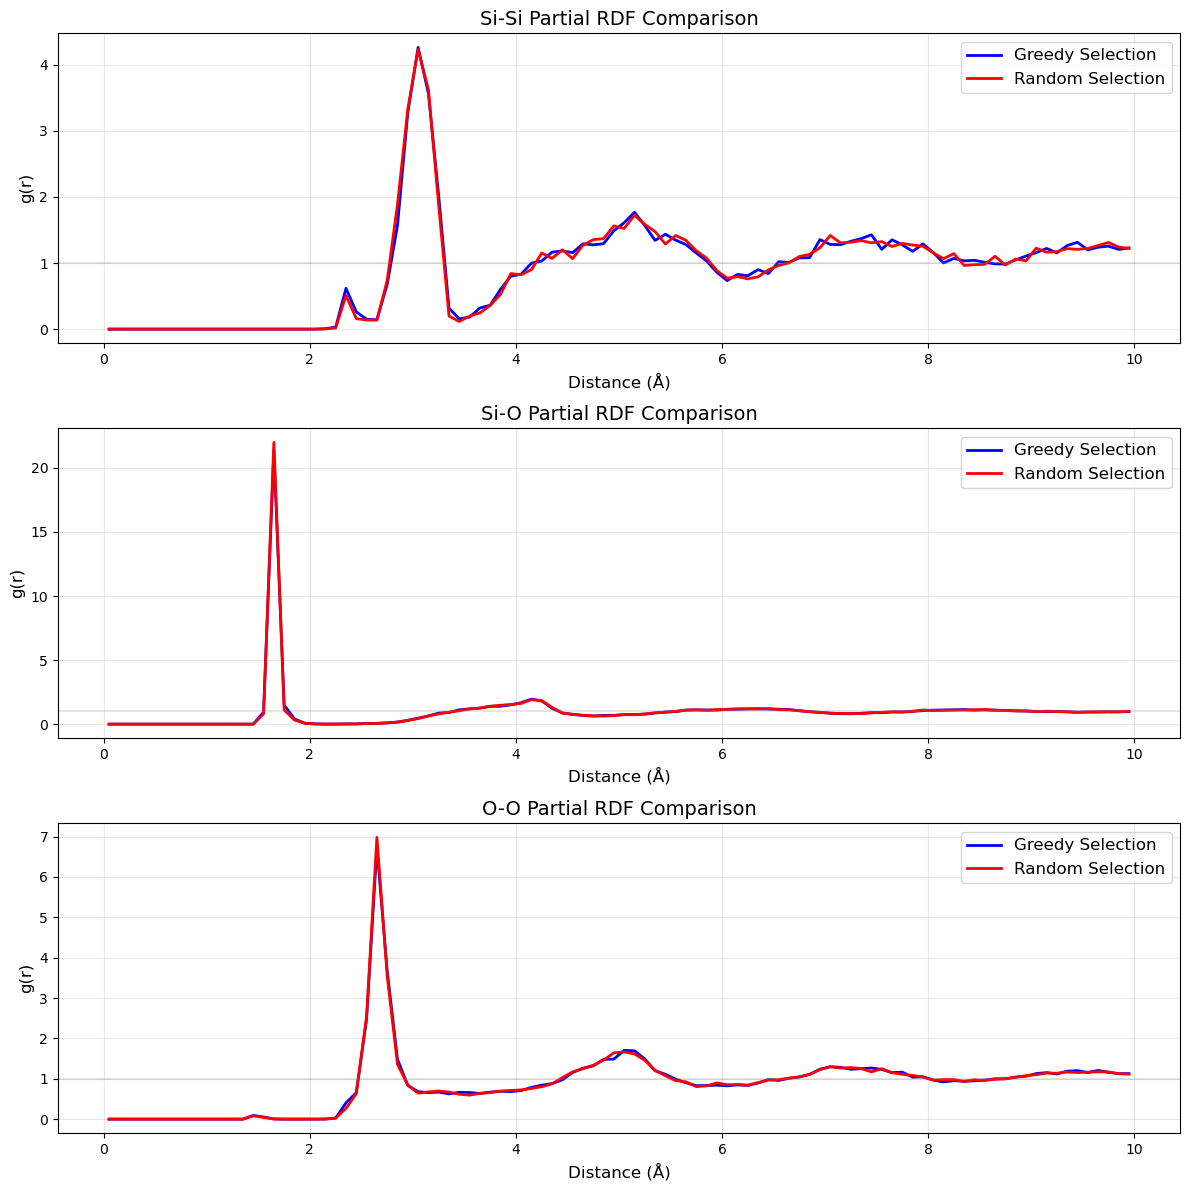

In [38]:
sample_size=200
selected_indices_mm = [718, 957, 391, 74, 316, 436, 260, 466, 479, 823, 550, 352, 590, 611, 293, 491, 937, 98, 919, 240, 698, 818, 990, 551, 46, 463, 571, 802, 556, 149, 709, 670, 988, 157, 786, 657, 160, 336, 209, 674, 52, 725, 967, 537, 612, 246, 946, 564, 338, 843, 748, 435, 518, 264, 963, 271, 886, 596, 182, 183, 139, 508, 329, 298, 862, 577, 829, 44, 775, 49, 66, 853, 492, 906, 434, 18, 366, 277, 721, 683, 420, 890, 655, 402, 239, 504, 372, 422, 676, 519, 224, 455, 825, 659, 73, 545, 387, 184, 194, 181, 866, 644, 84, 806, 371, 176, 119, 868, 158, 499, 753, 359, 779, 5, 850, 241, 835, 989, 147, 762, 272, 541, 237, 992, 378, 208, 700, 749, 764, 154, 144, 532, 860, 746, 799, 425, 554, 486, 954, 282, 647, 472, 487, 816, 900, 531, 448, 976, 536, 362, 426, 733, 707, 981, 213, 713, 368, 370, 847, 879, 878, 215, 828, 143, 858, 716, 190, 80, 769, 101, 177, 872, 47, 242, 759, 474, 691, 589, 737, 212, 439, 307, 563, 222, 991, 465, 309, 327, 305, 999, 851, 315, 780, 399, 760, 127, 507, 917, 489, 844]
print(len(selected_indices_mm))
# Define base path and file format
base_path = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_"
file_extension = "_iteration3.vasp"

# Generate the file paths
greedy_files = [f"{base_path}{num}{file_extension}" for num in selected_indices_mm]
print(greedy_files)
# Define path to files
file_path_pattern = "/Users/raphaelzstone/Documents/CMU/Research/Ensemble-Analysis/1k_poscar/SiO2_24_*.vasp"
all_files = glob.glob(file_path_pattern)

print(f"Found {len(all_files)} total files")

# Draw a random sample of 100 files
if len(all_files) >= sample_size:
    random_files = random.sample(all_files, sample_size)
else:
    print(f"Warning: Requested sample size {sample_size} is larger than available files ({len(all_files)})")
    random_files = all_files.copy()

print(f"Selected {len(random_files)} files randomly")
greedy_rdf = rdf_maker(greedy_files)
random_rdf = rdf_maker(random_files)

plt.figure(figsize=(12, 12))

# Iterate through the partial RDFs
for i, (elem_pair, _) in enumerate(greedy_rdf.items(), 1):
    elem1, elem2 = elem_pair
    
    plt.subplot(3, 1, i)
    
    # Plot greedy RDF
    r_greedy, rdf_greedy = greedy_rdf[elem_pair]
    plt.plot(r_greedy, rdf_greedy, 'b-', label='Greedy Selection', linewidth=2)
    
    # Plot random RDF
    r_random, rdf_random = random_rdf[elem_pair]
    plt.plot(r_random, rdf_random, 'r-', label='Random Selection', linewidth=2)
    
    plt.title(f'{elem1}-{elem2} Partial RDF Comparison', fontsize=14)
    plt.xlabel('Distance (Å)', fontsize=12)
    plt.ylabel('g(r)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Add subtle background shading for clearer comparison
    plt.axhline(y=1, color='gray', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()